<h1 style="font-size:80px;text-align:center;background-color:red;padding:50px 0;color:white;border-radius:20px">Retna Damage Detection<\h1>

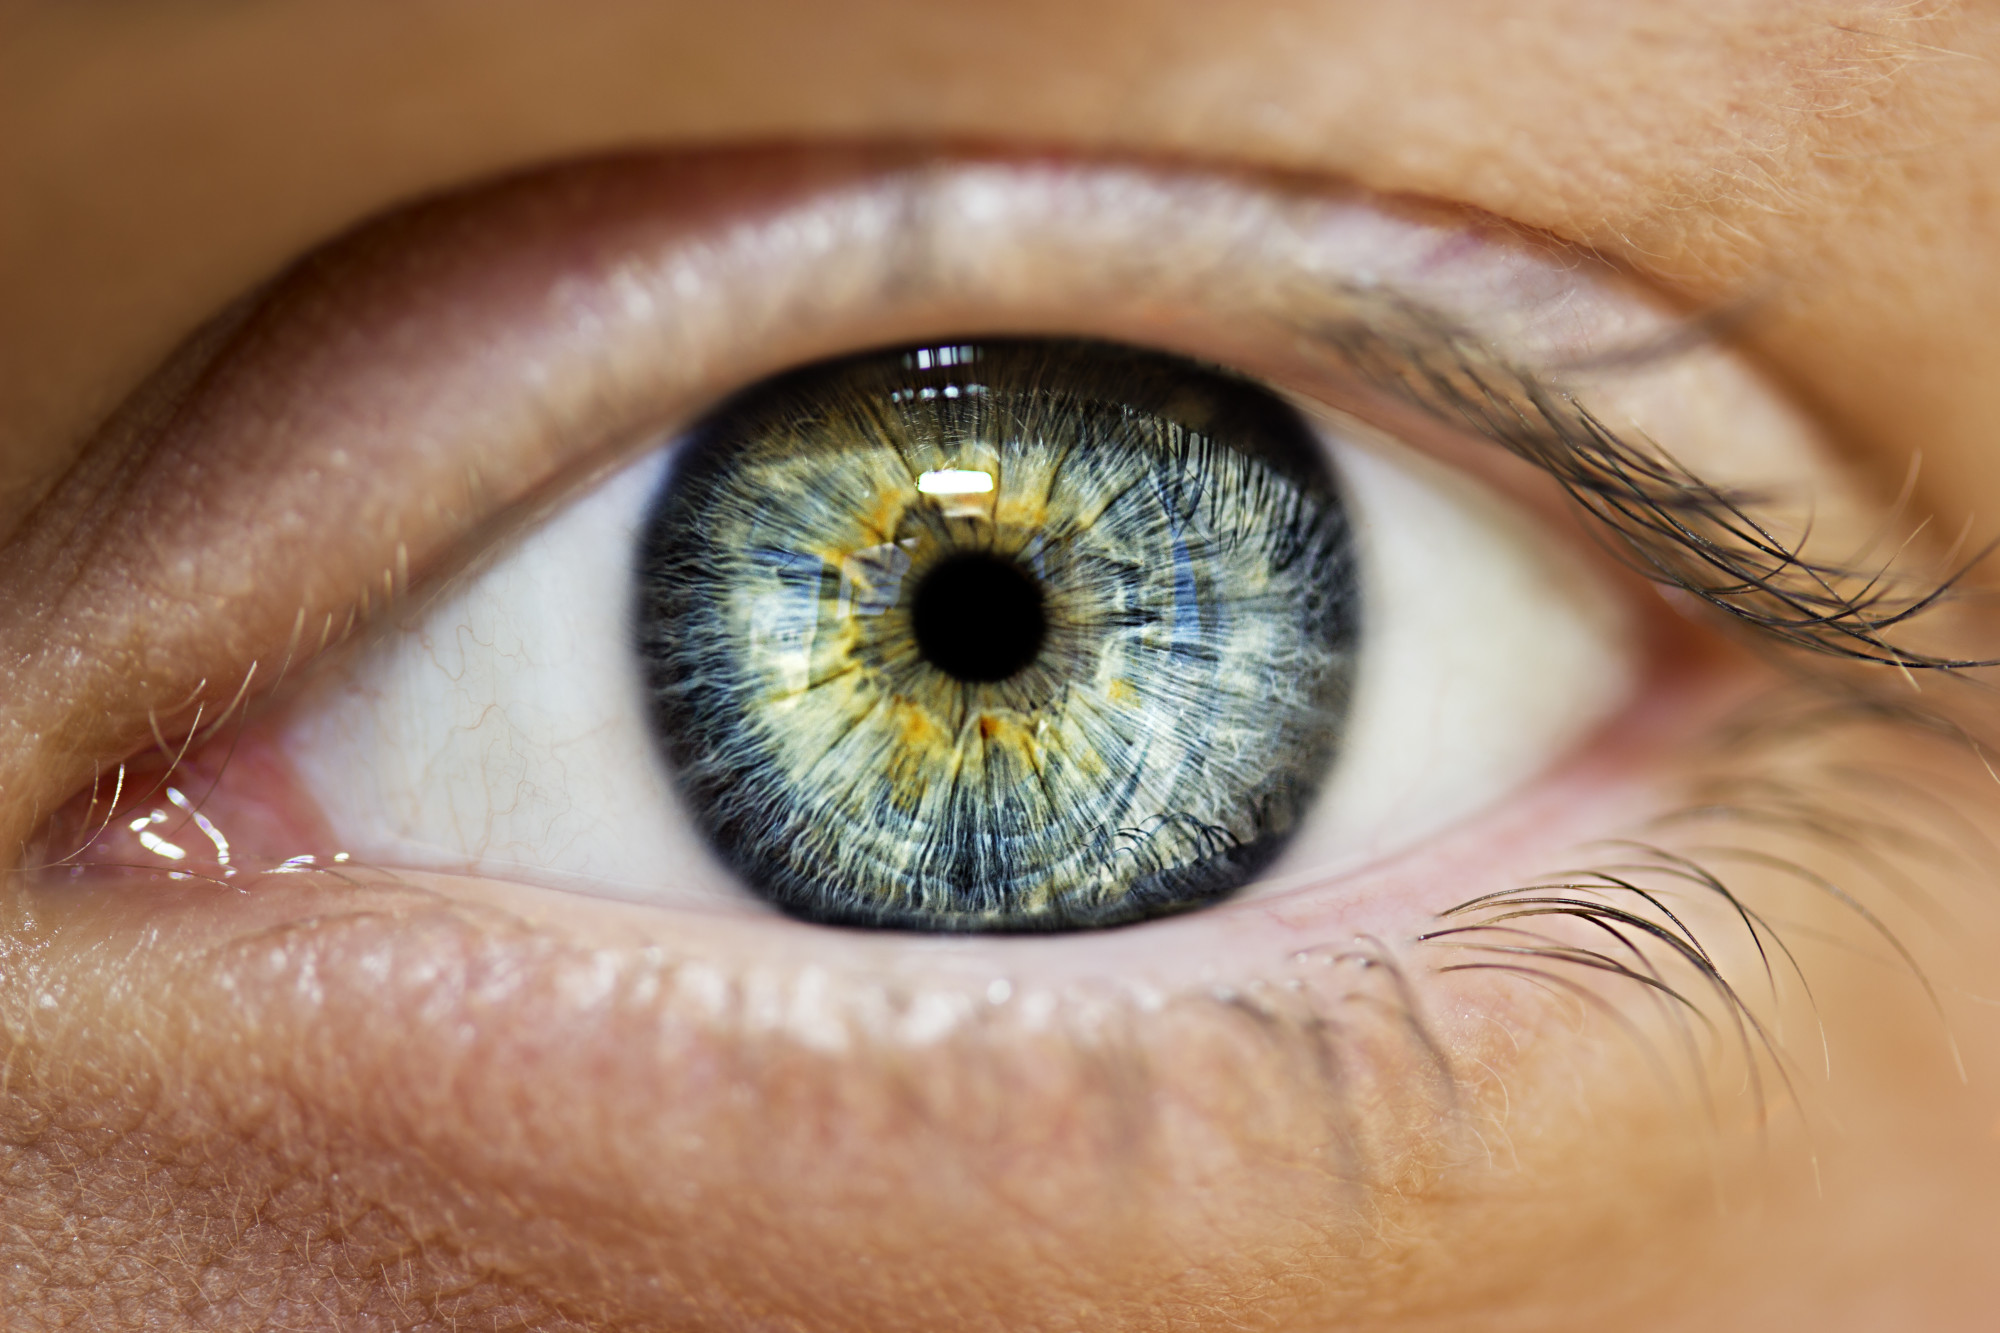

In [1]:
# Import libraries
import os,cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from keras import backend as K
K.image_data_format()
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from tensorflow.keras.optimizers import SGD,RMSprop,Adam
import glob
import warnings
warnings.filterwarnings("ignore")
import tensorflow as tf
warnings.filterwarnings("ignore")
import cv2
import tensorflow as tf
import numpy as np
import cv2
import os

from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator
from keras.utils.np_utils import to_categorical
from keras.models import Sequential,Model
from keras.layers import Dense
from keras.layers import Dropout,Flatten
from keras.layers.convolutional import Conv2D,MaxPooling2D
import pickle
from glob import glob
import skimage
warnings.filterwarnings("ignore")
import gc

# Loading the Data

In [2]:
train ="/kaggle/input/kermany2018/OCT2017 /train"
test ="/kaggle/input/kermany2018/OCT2017 /test"
validation ="/kaggle/input/kermany2018/OCT2017 /val"
main_dir = os.listdir('/kaggle/input/kermany2018/OCT2017 /')
print(main_dir)

for i in main_dir:
    data_dir_list =  os.listdir('/kaggle/input/kermany2018/OCT2017 /'+ str(i) )
    print(i, data_dir_list)

['val', 'test', 'train']
val ['DRUSEN', 'CNV', 'NORMAL', 'DME']
test ['DRUSEN', 'CNV', 'NORMAL', 'DME']
train ['DRUSEN', 'CNV', 'NORMAL', 'DME']


In [3]:
myList = os.listdir("/kaggle/input/kermany2018/OCT2017 /train")
print("Total Number of Classes Detected :",len(myList))
noOfclasses= len(myList)
print(myList)

Total Number of Classes Detected : 4
['DRUSEN', 'CNV', 'NORMAL', 'DME']


# Defining the Classes
### It contains four classes

- DRUSEN --> Eye contains yellow deposits under the retina
- CNV --> Presence of intraretinal or subretinal fluid, PEDs and/or RPE rips.
- NORMAL --> Eye is in normal condition
- DME --> Diabetic macular edema (DME) is a major cause of visual loss in the patients with diabetic retinopathy.

<h1 style="font-size:80px;text-align:center;background-color:red;padding:50px 0;color:white;border-radius:20px">Retina Visualization<\h1>

# Normal Retina

Normal


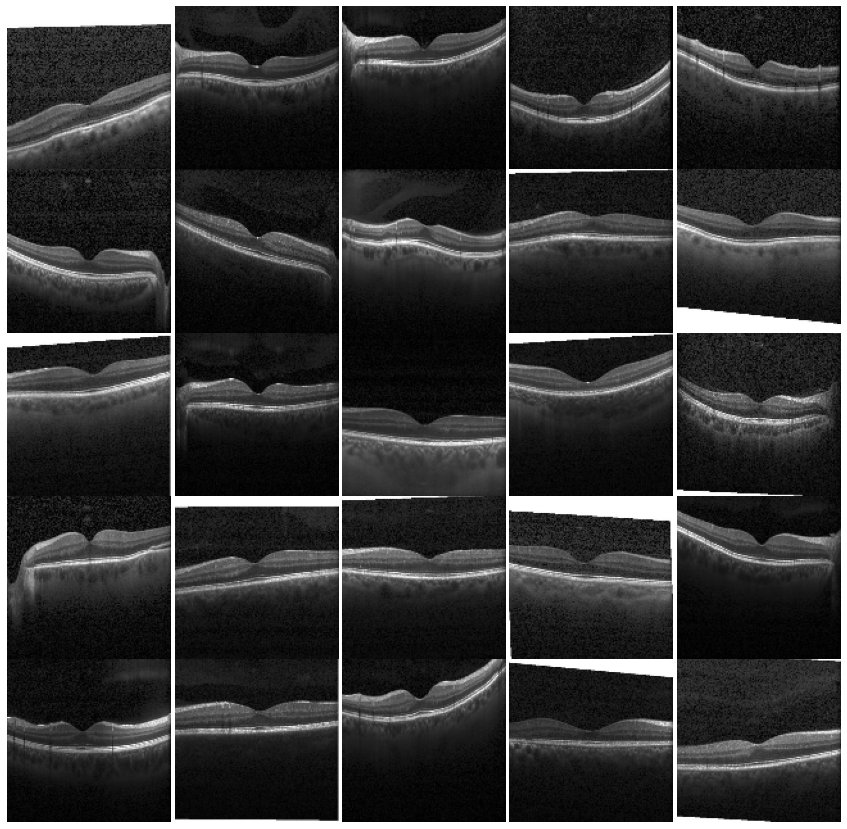

In [4]:
print("Normal")
multipleImages = glob('../input/kermany2018/oct2017/OCT2017 /train/NORMAL/**')
i_ = 0
plt.rcParams['figure.figsize'] = (15.0, 15.0)
plt.subplots_adjust(wspace=0, hspace=0)
for l in multipleImages[:25]:
    im = cv2.imread(l)
    im = cv2.resize(im, (128, 128)) 
    plt.subplot(5, 5, i_+1) #.set_title(l)
    plt.imshow(cv2.cvtColor(im, cv2.COLOR_BGR2RGB)); plt.axis('off')
    i_ += 1

# Abnormal Retina images is DRUSEN or CNV or DME

DME


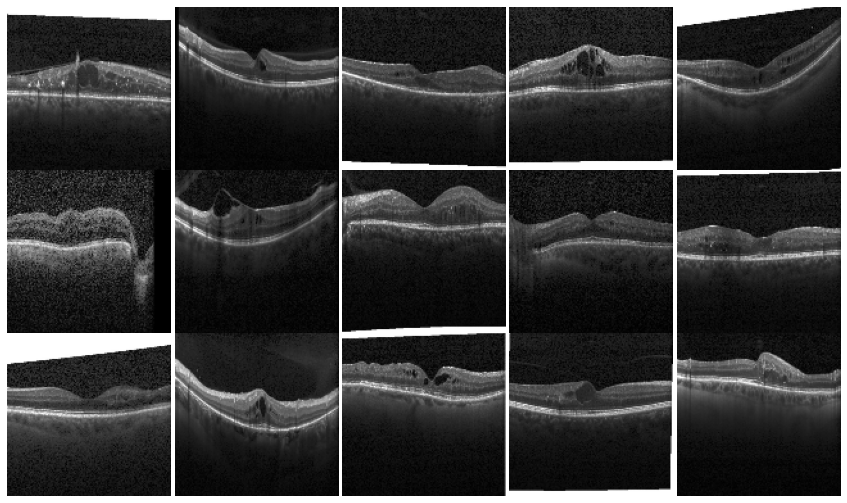

In [5]:
print("DME")
multipleImages = glob('../input/kermany2018/oct2017/OCT2017 /train/DME/**')
i_ = 0
plt.rcParams['figure.figsize']  =  (15.0, 15.0)
plt.subplots_adjust(wspace=0, hspace=0)
for l in multipleImages[:15]:
    im = cv2.imread(l)
    im = cv2.resize(im, (128, 128)) 
    plt.subplot(5, 5, i_+1) #.set_title(l)
    plt.imshow(cv2.cvtColor(im, cv2.COLOR_BGR2RGB)); plt.axis('off')
    i_ += 1

CNV


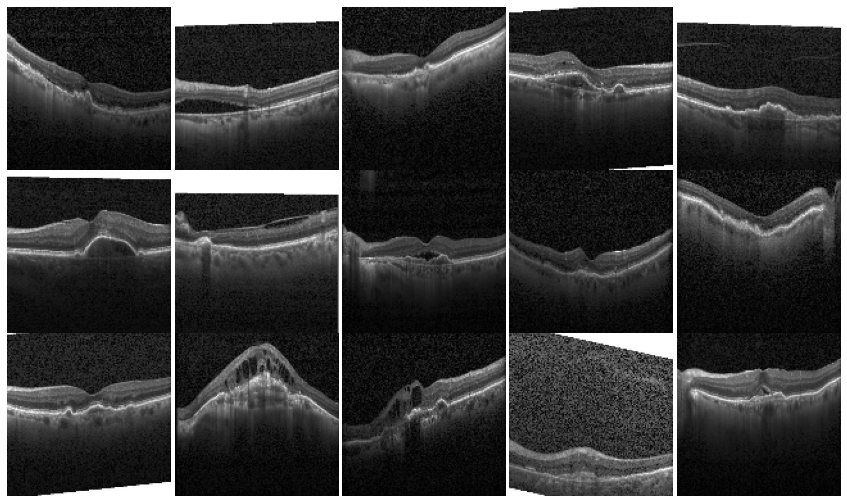

In [6]:
print("CNV")
multipleImages = glob('../input/kermany2018/oct2017/OCT2017 /train/CNV/**')
i_ = 0
plt.rcParams['figure.figsize'] = (15.0, 15.0)
plt.subplots_adjust(wspace=0, hspace=0)
for l in multipleImages[:15]:
    im = cv2.imread(l)
    im = cv2.resize(im, (128, 128)) 
    plt.subplot(5, 5, i_+1) #.set_title(l)
    plt.imshow(cv2.cvtColor(im, cv2.COLOR_BGR2RGB)); plt.axis('off')
    i_ += 1

DRUSEN


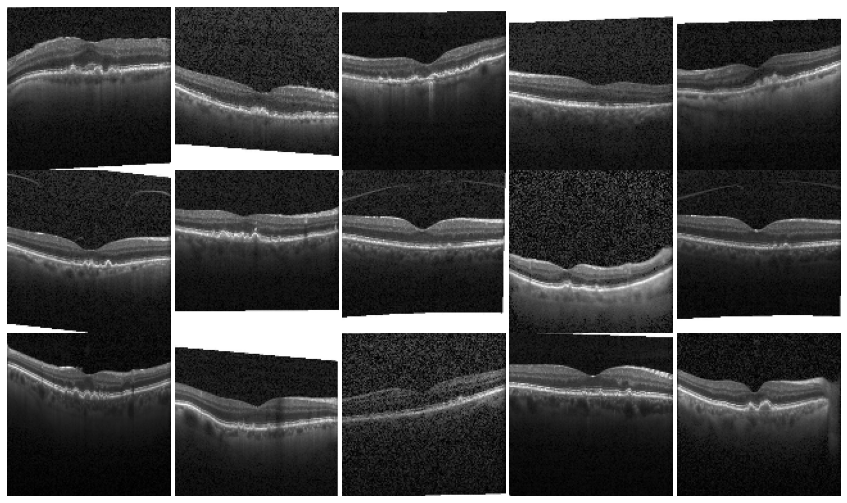

In [7]:
print("DRUSEN")
multipleImages = glob('../input/kermany2018/oct2017/OCT2017 /train/DRUSEN/**')
i_ = 0
plt.rcParams['figure.figsize']  = (15.0, 15.0)
plt.subplots_adjust(wspace=0, hspace=0)
for l in multipleImages[:15]:
    im = cv2.imread(l)
    im = cv2.resize(im, (128, 128)) 
    plt.subplot(5, 5, i_+1) #.set_title(l)
    plt.imshow(cv2.cvtColor(im, cv2.COLOR_BGR2RGB)); plt.axis('off')
    i_ += 1

<h1 style="font-size:80px;text-align:center;background-color:red;padding:50px 0;color:white;border-radius:20px">Images preprocessing<\h1>

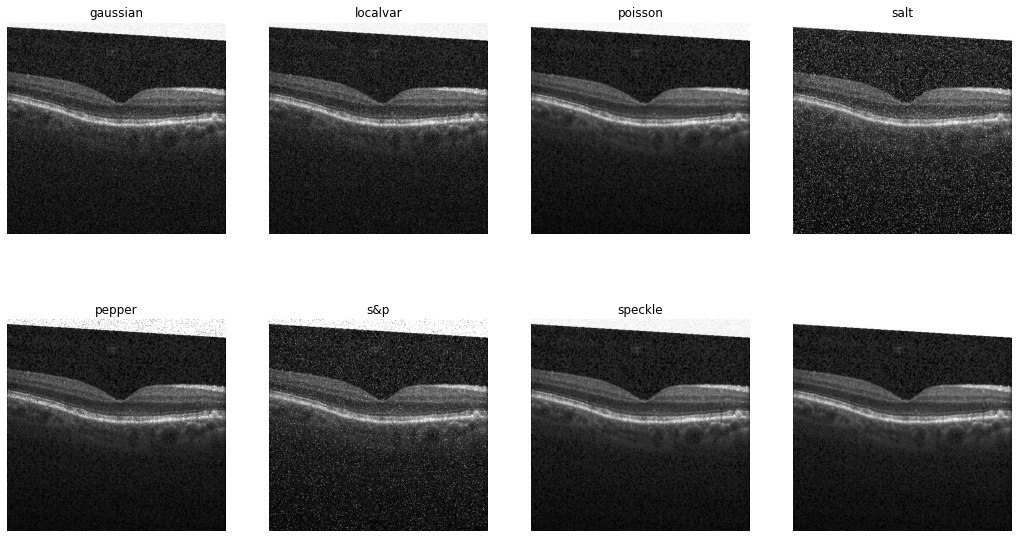

In [8]:
img_path="../input/kermany2018/OCT2017 /train/DRUSEN/DRUSEN-1001666-1.jpeg"
img = skimage.io.imread(img_path)/255.0

def plotnoise(img, mode, r, c, i):
    plt.subplot(r,c,i)
    if mode is not None:
        gimg = skimage.util.random_noise(img, mode=mode)
        plt.imshow(gimg,cmap=plt.cm.gray)
    else:
        plt.imshow(img,cmap=plt.cm.gray)
    plt.title(mode)
    plt.axis("off")

plt.figure(figsize=(18,10))
r=2
c=4
plotnoise(img, "gaussian", r,c,1)
plotnoise(img, "localvar", r,c,2)
plotnoise(img, "poisson", r,c,3)
plotnoise(img, "salt", r,c,4)
plotnoise(img, "pepper", r,c,5)
plotnoise(img, "s&p", r,c,6)
plotnoise(img, "speckle", r,c,7)
plotnoise(img,None , r,c,8)
plt.show()

In [9]:
path1 ="/kaggle/input/kermany2018/OCT2017 /train"
image_size=(128,128)
myList = os.listdir(path1)
some_images=[]
classNo=[]
for x in myList:
  myPicList = os.listdir(path1+"/"+str(x))
  for y in myPicList[:2]:
    curImg = cv2.imread(path1+"/"+str(x)+"/"+y)
    curImg = cv2.resize(curImg,(image_size[0],image_size[1]))
    some_images.append(curImg)
images = np.array(some_images)

In [10]:
height = 220
width = 220
dim = (width, height)
res_img1 = []
for i in range(len(images)): 
        res1 = cv2.resize(images[i], dim, interpolation=cv2.INTER_LINEAR)
        res_img1.append(res1)


print("RESIZED", res_img1[1].shape)

RESIZED (220, 220, 3)


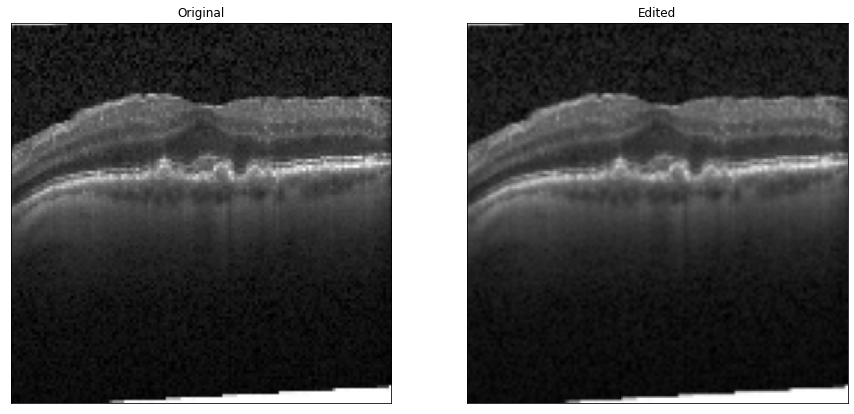

In [11]:
def display_one(images, title1 = "Original"):
    plt.imshow(images[0]), plt.title(title1)
    plt.xticks([]), plt.yticks([])
    plt.show()
# Display two images
def display(images, res_img, title1 = "Original", title2 = "Edited"):
    plt.subplot(121), plt.imshow(images[0],cmap=plt.cm.gray), plt.title(title1)
    plt.xticks([]), plt.yticks([])
    plt.subplot(122), plt.imshow(res_img[0],cmap=plt.cm.gray), plt.title(title2)
    plt.xticks([]), plt.yticks([])
    plt.show()
display(images,res_img1,title1 = "Original", title2 = "Edited")    

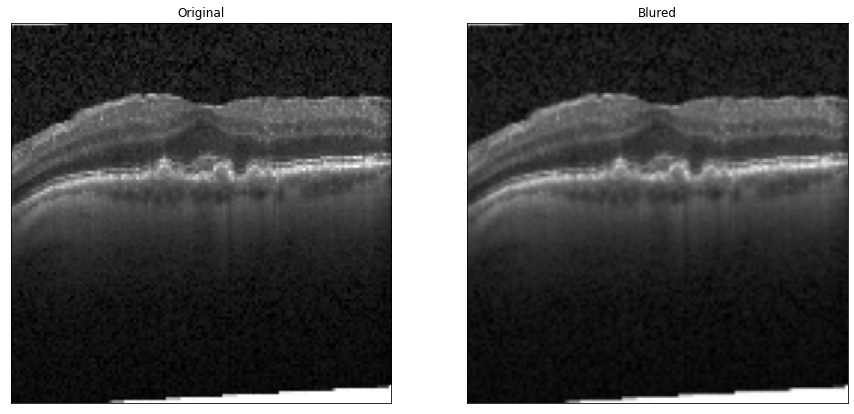

In [12]:
no_noise = []
for i in range(len(res_img1)):
    blur = cv2.GaussianBlur(res_img1[i], (5, 5), 0)
    no_noise.append(blur)


image = no_noise[1]
display(images, res_img1, 'Original', 'Blured')

<h1 style="font-size:80px;text-align:center;background-color:red;padding:50px 0;color:white;border-radius:20px">Read 40000 image<\h1>

# Read 10000 images from each class to train 

In [13]:
img_data_list=[]
img=0

# Define the number of classes
labels = []

for i in main_dir:
    data_dir_list =  os.listdir('/kaggle/input/kermany2018/OCT2017 /'+ str(i) )
    print(i, data_dir_list)
    
    for dataset in data_dir_list:
        img_list = os.listdir( '/kaggle/input/kermany2018/OCT2017 /'+str(i)+ '/' + dataset)
        print ('Loading the images of dataset-'+'{}\n'.format(dataset))
        
        for img in img_list[:10000]:
            input_img=cv2.imread('/kaggle/input/kermany2018/OCT2017 /' + str(i)+ '/'+ dataset + '/'+ img)
            
            input_img=cv2.cvtColor(input_img, cv2.COLOR_BGR2GRAY)
            input_img_resize=cv2.resize(input_img,(128,128))
            
            img_data_list.append(input_img_resize)
            
            if dataset==  'DRUSEN':
                labels.append(0)
                
            if dataset == 'CNV':
                labels.append(1)
                
            if dataset == 'NORMAL':
                labels.append(2)
                
            if dataset == 'DME':
                labels.append(3)

val ['DRUSEN', 'CNV', 'NORMAL', 'DME']
Loading the images of dataset-DRUSEN

Loading the images of dataset-CNV

Loading the images of dataset-NORMAL

Loading the images of dataset-DME

test ['DRUSEN', 'CNV', 'NORMAL', 'DME']
Loading the images of dataset-DRUSEN

Loading the images of dataset-CNV

Loading the images of dataset-NORMAL

Loading the images of dataset-DME

train ['DRUSEN', 'CNV', 'NORMAL', 'DME']
Loading the images of dataset-DRUSEN

Loading the images of dataset-CNV

Loading the images of dataset-NORMAL

Loading the images of dataset-DME



In [14]:
len(img_data_list)

39616

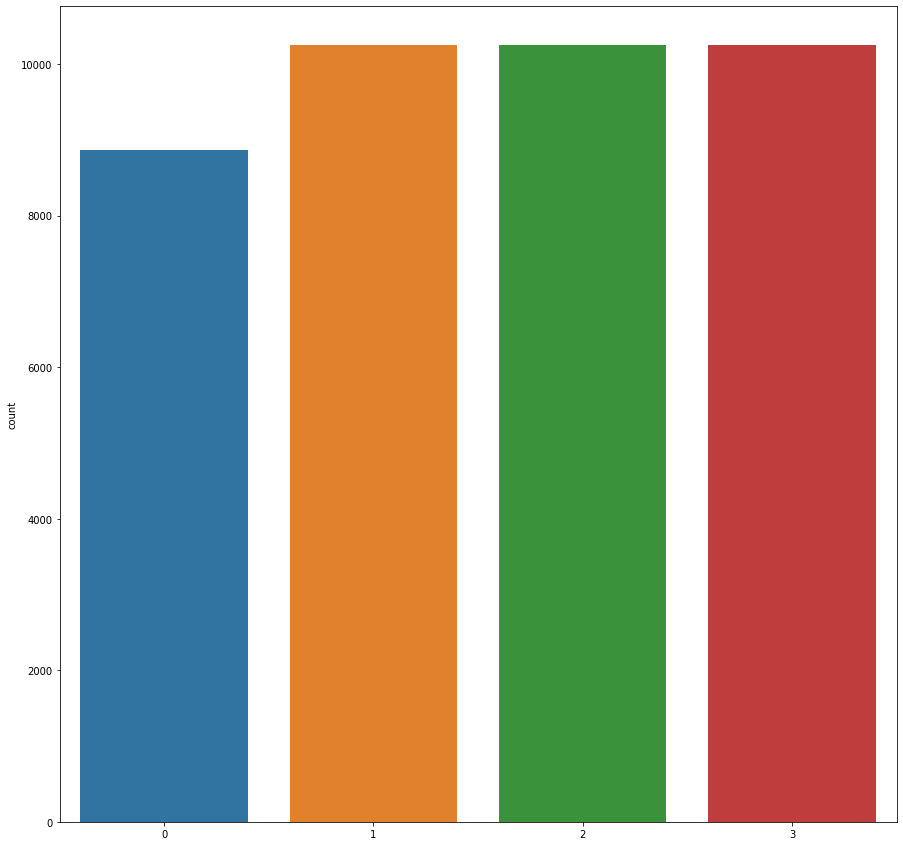

In [15]:
import seaborn as sns 
sns.countplot(labels);
plt.show()

# Image scaling

In [16]:
img_data_list = np.array(img_data_list)
img_data_list = img_data_list.astype('float32')
img_data_list /= 255
print (img_data_list.shape)

(39616, 128, 128)


# Adjust the dimentions of images 

In [17]:
num_channel=1
if num_channel==1:
    if K.image_data_format()=='th':
        img_data_list= np.expand_dims(img_data_list, axis=1)
        print (img_data_list.shape)
    else:
        img_data_list= np.expand_dims(img_data_list, axis=3)
        print (img_data_list.shape)

else:
    if K.image_data_format()=='th':
        img_data_list = np.rollaxis(img_data_list,3,1)
        print (img_data_list.shape)

(39616, 128, 128, 1)


In [18]:
# Define the number of classes
num_classes = 4

names = ['DRUSEN','CNV','NORMAL', 'DME']

# convert class labels to on-hot encoding
Y = np_utils.to_categorical(labels, num_classes)

<h1 style="font-size:80px;text-align:center;background-color:red;padding:50px 0;color:white;border-radius:20px">Modeling<\h1>

In [19]:
# Split the dataset 

X_train, X_test, y_train, y_test = train_test_split(img_data_list, Y, test_size=0.2, random_state=1)

X_train, X_val, y_train, y_val  = train_test_split(X_train, y_train, test_size=0.1, random_state=1)

In [20]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)
print(X_val.shape)
print(y_val.shape)

(28522, 128, 128, 1)
(28522, 4)
(7924, 128, 128, 1)
(7924, 4)
(3170, 128, 128, 1)
(3170, 4)


In [21]:
gc.collect()

32342

In [22]:
def model():
  filters=60
  sizeoffilter1 = (5,5)
  sizeoffilter2 = (4,4)
  sizeoffilter3 = (3,3)
  sizeofpool = (2,2)
  node=5000

  model = Sequential();
  model.add((Convolution2D(filters,sizeoffilter1,input_shape=(128,128,1)
  ,activation="relu")))

  model.add((Convolution2D(filters,sizeoffilter1,activation="relu")))
  model.add((Convolution2D(filters//2,sizeoffilter2,activation="relu")))
  model.add((Convolution2D(filters//2,sizeoffilter2,activation="relu")))
  model.add(MaxPooling2D(pool_size=sizeofpool))
  model.add(Dropout(0.2))

  model.add((Convolution2D(filters,sizeoffilter1,activation="relu")))
  model.add((Convolution2D(filters//2,sizeoffilter2,activation="relu")))
  model.add((Convolution2D(filters//2,sizeoffilter2,activation="relu")))
  model.add(MaxPooling2D(pool_size=sizeofpool))
  model.add(Dropout(0.2))

  model.add((Convolution2D(filters,sizeoffilter2,activation="relu")))
  model.add(MaxPooling2D(pool_size=sizeofpool))
  model.add((Convolution2D(filters//2,sizeoffilter3,activation="relu")))
  model.add((Convolution2D(filters//2,sizeoffilter3,activation="relu")))
  model.add(MaxPooling2D(pool_size=sizeofpool))
  model.add(Dropout(0.2))

  model.add(Flatten())
  model.add(Dense(node,activation="relu"))
  model.add(Dropout(0.2))
  model.add(Dense(4,activation="softmax"))

  model.compile(Adam(lr=0.001),loss="categorical_crossentropy",metrics=['accuracy'])

  return model
  
model=model()
model.summary()

2022-11-13 22:46:05.686609: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-13 22:46:05.687585: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-13 22:46:05.946594: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-13 22:46:05.947589: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-13 22:46:05.948364: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from S

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 124, 124, 60)      1560      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 120, 120, 60)      90060     
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 117, 117, 30)      28830     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 114, 114, 30)      14430     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 57, 57, 30)        0         
_________________________________________________________________
dropout (Dropout)            (None, 57, 57, 30)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 53, 53, 60)        4

# Fitting the model

In [23]:
history = model.fit(X_train,y_train,epochs=25,batch_size=256,
                    shuffle=True,
                    max_queue_size=20,
                    use_multiprocessing=True,
                    workers=1,validation_data=(X_val, y_val))

2022-11-13 22:46:11.108084: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 1869217792 exceeds 10% of free system memory.
2022-11-13 22:46:13.281390: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 1869217792 exceeds 10% of free system memory.
2022-11-13 22:46:14.756473: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/25


2022-11-13 22:46:17.490230: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


112/112 [==============================] - 112s 763ms/step - loss: 1.2721 - accuracy: 0.3885 - val_loss: 0.9059 - val_accuracy: 0.6470
Epoch 2/25
112/112 [==============================] - 80s 712ms/step - loss: 0.7910 - accuracy: 0.6882 - val_loss: 0.6182 - val_accuracy: 0.7628
Epoch 3/25
112/112 [==============================] - 80s 711ms/step - loss: 0.5953 - accuracy: 0.7767 - val_loss: 0.4941 - val_accuracy: 0.8297
Epoch 4/25
112/112 [==============================] - 80s 712ms/step - loss: 0.4452 - accuracy: 0.8402 - val_loss: 0.3976 - val_accuracy: 0.8593
Epoch 5/25
112/112 [==============================] - 80s 712ms/step - loss: 0.3759 - accuracy: 0.8651 - val_loss: 0.3306 - val_accuracy: 0.8868
Epoch 6/25
112/112 [==============================] - 80s 712ms/step - loss: 0.3396 - accuracy: 0.8771 - val_loss: 0.3401 - val_accuracy: 0.8858
Epoch 7/25
112/112 [==============================] - 80s 711ms/step - loss: 0.3169 - accuracy: 0.8880 - val_loss: 0.2926 - val_accuracy: 0.

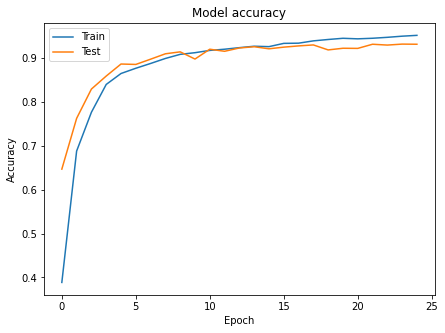

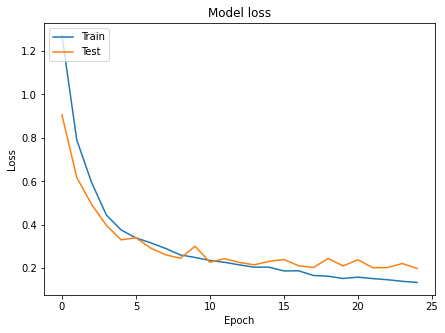

In [32]:
# Plot training & validation accuracy values
plt.figure(figsize=(7,5))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.figure(figsize=(7,5))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [25]:
# Evaluate the model w.r.t Test Loss and Test Accuracy
score = model.evaluate(X_test, y_test)
print('Test Loss:', score[0])

print('Test accuracy:', score[1])

2022-11-13 23:20:38.122933: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 519307264 exceeds 10% of free system memory.
2022-11-13 23:20:38.841667: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 519307264 exceeds 10% of free system memory.


248/248 [==============================] - 9s 30ms/step - loss: 0.2074 - accuracy: 0.9313
Test Loss: 0.20739254355430603
Test accuracy: 0.9313477873802185


In [34]:
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
model.save_weights("model.h5")
print("Saved model to disk")

Saved model to disk


In [27]:
# Evaluate the model w.r.t Test Loss and Test Accuracy
score = model.evaluate(X_test, y_test)
print('Test Loss:', score[0])

print('Test accuracy:', score[1])

2022-11-13 23:20:49.612697: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 519307264 exceeds 10% of free system memory.


248/248 [==============================] - 7s 27ms/step - loss: 0.2074 - accuracy: 0.9313
Test Loss: 0.20739254355430603
Test accuracy: 0.9313477873802185


# Test cases

In [64]:
imge_path1 = "../input/kermany2018/OCT2017 /train/DME/DME-1072015-1.jpeg"  #DME
imge_path2 = "../input/kermany2018/OCT2017 /train/CNV/CNV-1016042-100.jpeg"  #DRUSEN

def predict(img): 
    input_img = cv2.imread(img) 
    input_img = cv2.cvtColor(input_img, cv2.COLOR_BGR2GRAY) 
    input_img_resize = cv2.resize(input_img,(128,128)) 
    input_img_resize = np.expand_dims(input_img_resize, axis=2) 
    input_img_resize = np.expand_dims(input_img_resize, axis=0) 
    model_prediction = model.predict(input_img_resize) 
    model_prediction = model_prediction.astype(int) 
    return model_prediction 

print(predict(imge_path1))
print(predict(imge_path2))

# The order of labels
# 'DRUSEN','CNV','NORMAL', 'DME'

[[0 0 0 1]]
[[1 0 0 0]]


True prediction for 2 random test cases

<h1 style="font-size:80px;text-align:center;background-color:red;padding:50px 0;color:white;border-radius:20px">End<\h1>